# Analyzing data from the National Bouy System

## Background

The National Data Buoys Data center publish oceanographic data from their buoys on their web. Bouys send up their measurements every hour and the data is published as a spreadsheet in the NOAA web site.

We want to collect the data for any, or many, bouys, clean it up, and analyze it to make a plot.

## Challenges

- Get the data from the web and read it into our Python notebook.
- Clean up the data, which sometimes has missing measurements.
- Choose the bouys we want to analyze using their ID numbers.
- Run our analysis (we will just make a plot).
- Save our code as a script or module for reusing it later.

## References 

- National Data Buoy Center: http://www.ndbc.noaa.gov/
- Data for Station 44255 - NE Burgeo Bank: http://www.ndbc.noaa.gov/station_realtime.php?station=44255
- How a buoy get an ID: http://www.ndbc.noaa.gov/staid.shtml
- All the station IDs: http://www.ndbc.noaa.gov/to_station.shtml

In [1]:
url = 'http://www.ndbc.noaa.gov/data/realtime2/44255.txt'

In [3]:
import requests

In [5]:
help(requests)

Help on package requests:

NAME
    requests

FILE
    c:\users\john\anaconda\lib\site-packages\requests\__init__.py

DESCRIPTION
    requests HTTP library
    ~~~~~~~~~~~~~~~~~~~~~
    
    Requests is an HTTP library, written in Python, for human beings. Basic GET
    usage:
    
       >>> import requests
       >>> r = requests.get('https://www.python.org')
       >>> r.status_code
       200
       >>> 'Python is a programming language' in r.content
       True
    
    ... or POST:
    
       >>> payload = dict(key1='value1', key2='value2')
       >>> r = requests.post('http://httpbin.org/post', data=payload)
       >>> print(r.text)
       {
         ...
         "form": {
           "key2": "value2",
           "key1": "value1"
         },
         ...
       }
    
    The other HTTP methods are supported - see `requests.api`. Full documentation
    is at <http://python-requests.org>.
    
    :copyright: (c) 2015 by Kenneth Reitz.
    :license: Apache 2.0, see LICENSE for mo

In [6]:
response = requests.get(url)

In [12]:
print response.text[:200]
type(response.text)

#YY  MM DD hh mm WDIR WSPD GST  WVHT   DPD   APD MWD   PRES  ATMP  WTMP  DEWP  VIS PTDY  TIDE
#yr  mo dy hr mn degT m/s  m/s     m   sec   sec degT   hPa  degC  degC  degC  nmi  hPa    ft
2015 08 28 1


unicode

In [15]:
import StringIO
data_as_string = StringIO.StringIO(response.text)
print data_as_string

<StringIO.StringIO instance at 0x0000000003D2D688>


In [18]:
import pandas as pd
# pandas is a built in excel-oid processor

In [24]:
data = pd.read_csv(StringIO.StringIO(response.text),
                   delim_whitespace=True, 
                   skiprows=[1,2], 
                   usecols=[0,1,2,3,6,12])

In [25]:
print data

       #YY  MM  DD  hh  WSPD    PRES
0     2015   8  28  18     8  1010.3
1     2015   8  28  17     8  1010.3
2     2015   8  28  16     9  1010.1
3     2015   8  28  15     7  1010.1
4     2015   8  28  14     5  1009.9
5     2015   8  28  13     7  1009.3
6     2015   8  28  12     6  1009.1
7     2015   8  28  11     5  1008.7
8     2015   8  28  10     5  1008.8
9     2015   8  28   9     7  1008.4
10    2015   8  28   8     9  1008.3
11    2015   8  28   7    11  1008.9
12    2015   8  28   6     8  1010.2
13    2015   8  28   5    10  1011.8
14    2015   8  28   4     9  1013.8
15    2015   8  28   3    10  1014.2
16    2015   8  28   2    11  1014.5
17    2015   8  28   1     8  1016.3
18    2015   8  28   0     8  1016.9
19    2015   8  27  23     7  1017.1
20    2015   8  27  22     8  1017.0
21    2015   8  27  21     7  1017.4
22    2015   8  27  20     8  1017.9
23    2015   8  27  19     6  1018.4
24    2015   8  27  18     6  1019.2
25    2015   8  27  17     6  1019.5
2

In [31]:
from numpy import nan
data = data.replace('MM',nan)
data = data.dropna(axis=0)

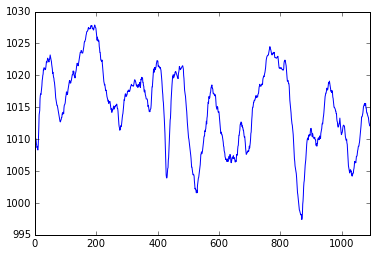

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
data.PRES.plot()
